In [8]:
import os 
import glob
import shutil
import random
os.chdir('/Users/batu/Desktop/DeepLearningProject/data/happy-vs-angry') 
if  os.path.isdir('test/angry') is False:
    os.makedirs('test/angry')
    os.makedirs('test/happy')  

for i in random.sample(glob.glob('train/angry/*'), 1000):
    shutil.move(i, 'test/angry')
for i in random.sample(glob.glob('train/happy/*'), 1000):
    shutil.move(i, 'test/happy')

In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_directory = '/Users/batu/Desktop/DeepLearningProject/data/happy-vs-angry/train'
validation_directory = '/Users/batu/Desktop/DeepLearningProject/data/happy-vs-angry/validation'
test_directory = '/Users/batu/Desktop/DeepLearningProject/data/happy-vs-angry/test'

IMAGE_SIZE = (48, 48)
BATCH_SIZE = 10
COLOR_MODE = 'grayscale'

# Seed for reproducibility how can we decide this value?
SEED = None

train_set = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')
valid_set = ImageDataGenerator(rescale=1./255)
test_set = ImageDataGenerator(rescale=1./255)

train_batch = train_set.flow_from_directory(
    directory = train_directory,
    target_size=IMAGE_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    classes=['angry', 'happy'],
)
valid_batch = valid_set.flow_from_directory(
    directory = validation_directory,
    target_size=IMAGE_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    classes=['angry', 'happy'],
)
test_batch = test_set.flow_from_directory(
    directory = test_directory,
    target_size=IMAGE_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    classes=['angry', 'happy'],
)

Found 9157 images belonging to 2 classes.
Found 2785 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [72]:
assert train_batch.n == 9157
assert valid_batch.n == 2785
assert test_batch.n == 2000
assert train_batch.num_classes == valid_batch.num_classes == test_batch.num_classes == 2

In [73]:
import matplotlib.pyplot as plt

In [74]:
imgs, labels = next(train_batch)

In [75]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

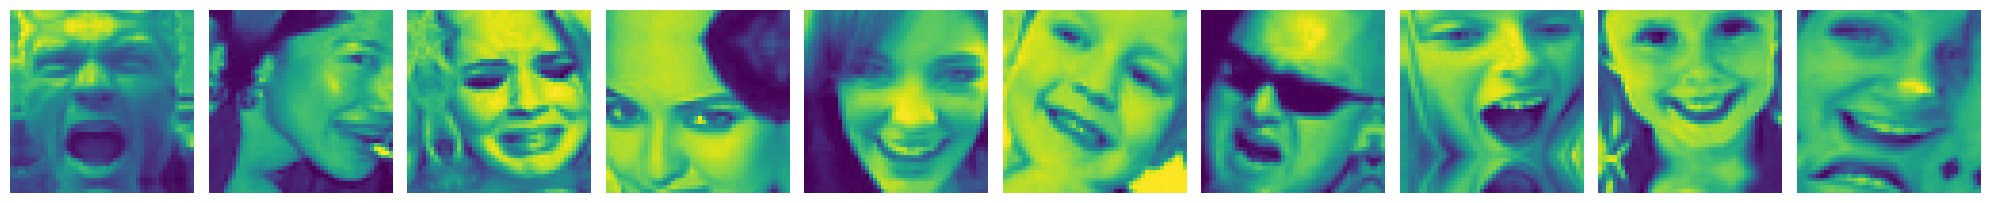

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [76]:
plotImages(imgs)
print(labels)

In [77]:
print(imgs.shape) # (10, 48, 48, 1) 10 images, 48x48 pixels, 1 channel (grayscale)

(10, 48, 48, 1)


In [70]:
'''
def enhanced_data_augmentation(image, training):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_contrast(image, lower=0.2, upper=2.0)
    if training:
        image = tf.image.random_rotation(image, angles=tf.random.uniform(shape=[], minval=-0.2, maxval=0.2), fill_mode='reflect')
        image = tf.image.random_zoom(image, zoom_range=(0.8, 1.2), fill_mode='reflect')
    image = tf.clip_by_value(image, 0, 1)
    return image
'''



In [85]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam

no_of_classes = 2

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



# 4th CNN layer
model.add(Conv2D(512, (3, 3) , padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))



# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))



model.add(Dense(units=2, activation='softmax'))

opt = Adam(learning_rate=0.0001)  # Note the change from lr to learning_rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
# Train the mdoel tomorrow
history = model.fit(x= train_batch, validation_data= valid_batch, epochs=50, verbose= 2)

Epoch 1/50
916/916 - 73s - loss: 0.7626 - accuracy: 0.6159 - val_loss: 0.6370 - val_accuracy: 0.6650 - 73s/epoch - 80ms/step
Epoch 2/50
916/916 - 73s - loss: 0.7180 - accuracy: 0.6242 - val_loss: 0.6287 - val_accuracy: 0.6636 - 73s/epoch - 80ms/step
Epoch 3/50
916/916 - 75s - loss: 0.7033 - accuracy: 0.6232 - val_loss: 0.6274 - val_accuracy: 0.6610 - 75s/epoch - 82ms/step
Epoch 4/50
916/916 - 75s - loss: 0.6801 - accuracy: 0.6422 - val_loss: 0.6231 - val_accuracy: 0.6603 - 75s/epoch - 82ms/step
Epoch 5/50
916/916 - 75s - loss: 0.6758 - accuracy: 0.6363 - val_loss: 0.6318 - val_accuracy: 0.6589 - 75s/epoch - 81ms/step
Epoch 6/50
916/916 - 75s - loss: 0.6637 - accuracy: 0.6414 - val_loss: 0.6211 - val_accuracy: 0.6657 - 75s/epoch - 82ms/step
Epoch 7/50
916/916 - 76s - loss: 0.6518 - accuracy: 0.6505 - val_loss: 0.6301 - val_accuracy: 0.6707 - 76s/epoch - 82ms/step
Epoch 8/50
916/916 - 78s - loss: 0.6339 - accuracy: 0.6651 - val_loss: 0.6119 - val_accuracy: 0.6768 - 78s/epoch - 85ms/step


Found 2000 images belonging to 2 classes.


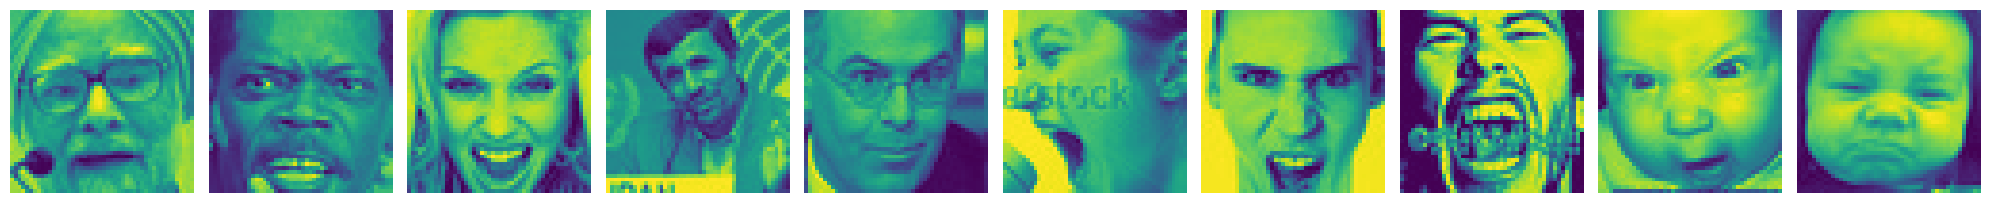

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [111]:
test_directory = '/Users/batu/Desktop/DeepLearningProject/data/happy-vs-angry/test'
test_batch = test_set.flow_from_directory(
    directory = test_directory,
    target_size=IMAGE_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    classes=['angry', 'happy'],
    shuffle=False
)
imgs, labels = next(test_batch)
plotImages(imgs)
print(labels)

In [103]:
print(imgs.shape)

(10, 48, 48, 1)


In [104]:
test_batch.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [112]:
prediction = model.predict(x=test_batch, verbose=0)

In [113]:
import numpy as np
prediction = np.round(prediction)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [114]:
# İmport the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_batch.classes, y_pred=np.argmax(prediction, axis=-1))

In [116]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_batch.classes, y_pred=prediction.argmax(axis=-1))
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[839 161]
 [ 61 939]]


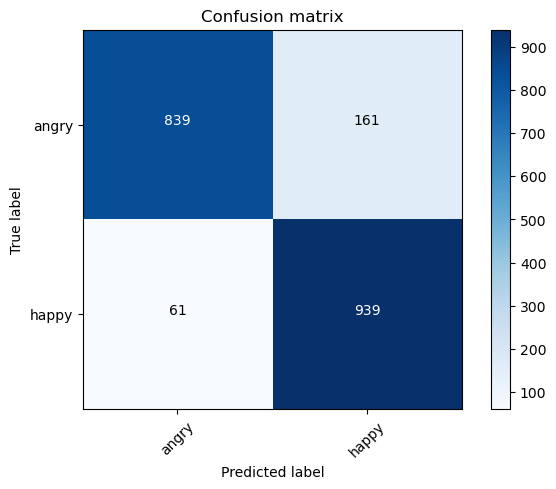

In [117]:
plot_confusion_matrix(cm, ['angry', 'happy'])

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_true=test_batch.classes, y_pred=prediction.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1000
           1       0.85      0.94      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



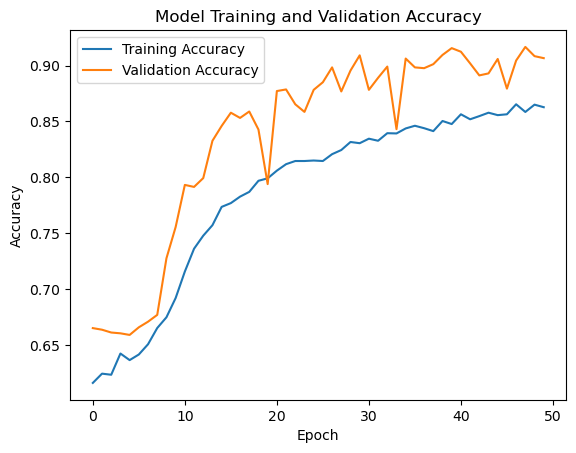

In [120]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [124]:
model_path = '/path/to/your/model'
import os 
if not os.path.exists(model_path):
    os.makedirs('models')   

In [126]:
# Load the model json file
from keras.models import load_model  
load_model = load_model('/Users/batu/Desktop/DeepLearningProject/FourthModel/FourthModel.h5')
model_json = load_model.to_json()

In [128]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_12_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_12", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 48, 48, 1], "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_18", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilo